In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats

In [40]:
df1 = '/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/removed_meausred.csv'
df2 = '/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/removed_meausred_0.csv'
df3 = '/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/removed_meausred_25.csv'
df4 = '/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/removed_meausred_50.csv'
df5 = '/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/removed_meausred_75.csv'
df7 = '/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/removed_meausred_a25.csv'
df_main = pd.concat([pd.read_csv(f) for f in [df1, df2, df3, df4, df5, df7]], ignore_index=True)

In [42]:
def extract_percentage(text):
    """Extract numeric percentage value from text"""
    if pd.isna(text) or text == '':
        return None
    
    # Use regex to find percentage value
    match = re.search(r'(\d+(?:\.\d+)?)\s*%', str(text))
    if match:
        return float(match.group(1))
    
    # If no match found, return None
    return None

# Create new column with extracted percentages
df_main['predicted_percentage'] = df_main['result'].apply(extract_percentage)

Ground truth values found: [np.int64(-25), np.int64(0), np.int64(25), np.int64(50), np.int64(75), np.int64(100)]

MEAN ERROR BY GROUND TRUTH CLASS

Ground Truth = -25%:
  N = 5
  Mean Error: 85.60% ± 8.91%
  Range: [75.0%, 98.0%]

Ground Truth = 0%:
  N = 5
  Mean Error: 57.00% ± 11.51%
  Range: [40.0%, 70.0%]

Ground Truth = 25%:
  N = 5
  Mean Error: 26.40% ± 9.61%
  Range: [18.0%, 40.0%]

Ground Truth = 50%:
  N = 5
  Mean Error: 6.00% ± 9.17%
  Range: [-1.0%, 17.0%]

Ground Truth = 75%:
  N = 5
  Mean Error: -7.80% ± 7.05%
  Range: [-15.0%, 3.0%]

Ground Truth = 100%:
  N = 10
  Mean Error: -2.20% ± 1.69%
  Range: [-5.0%, 0.0%]

Overall Mean Error (Bias): 23.26%
Overall Std: 34.19%

✓ Plot saved successfully to: /mnt/user-data/outputs/mean_error_with_scatter.png


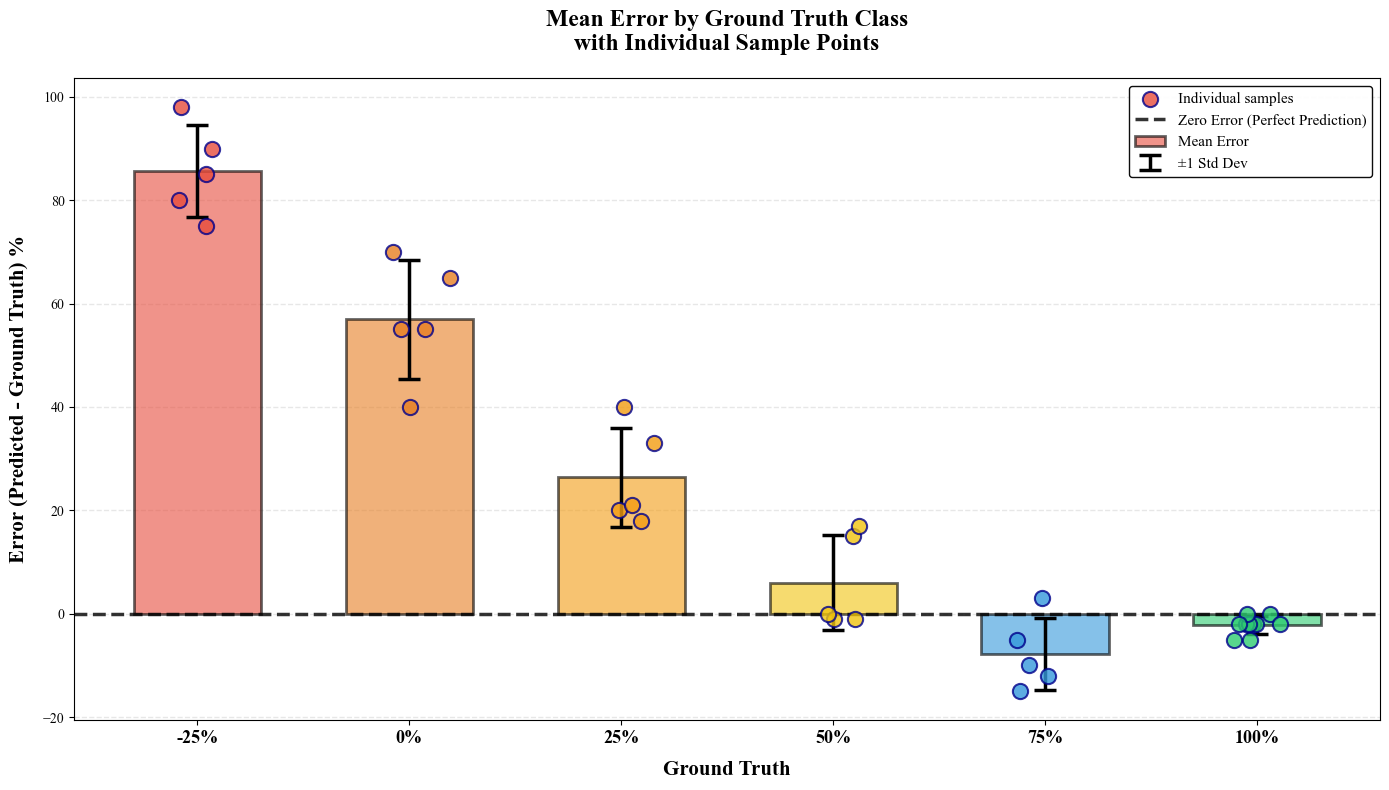

In [43]:
# Load your dataframe (replace this with your actual df_clean)
# df_clean should have columns: 'groundtruth' and 'predicted_percentage'

# Calculate errors
df_clean['error'] = df_clean['predicted_percentage'] - df_clean['groundtruth']
df_clean['abs_error'] = df_clean['error'].abs()

# Get unique ground truth values and sort them
gt_values = sorted(df_clean['groundtruth'].unique())
print(f"Ground truth values found: {gt_values}")

# Create color mapping dynamically
colors_list = ['#E74C3C', '#E67E22', '#F39C12', '#F1C40F', '#3498DB', '#2ECC71', '#9B59B6', '#1ABC9C']
colors_dict = {gt: colors_list[i % len(colors_list)] for i, gt in enumerate(gt_values)}
labels_dict = {gt: f'{gt}%' for gt in gt_values}

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Calculate mean errors and std
x_pos = np.arange(len(gt_values))
mean_errors = [df_clean[df_clean['groundtruth'] == gt]['error'].mean() for gt in gt_values]
std_errors = [df_clean[df_clean['groundtruth'] == gt]['error'].std() for gt in gt_values]

# Plot bars with error bars
bars = ax.bar(x_pos, mean_errors, 
              color=[colors_dict[gt] for gt in gt_values], 
              alpha=0.6, edgecolor='black', linewidth=2,
              width=0.6, label='Mean Error')

# Add error bars
ax.errorbar(x_pos, mean_errors, yerr=std_errors, 
           fmt='none', color='black', capsize=8, linewidth=2.5, 
           capthick=2.5, label='±1 Std Dev')

# Overlay individual scatter points
for i, gt in enumerate(gt_values):
    subset = df_clean[df_clean['groundtruth'] == gt]
    errors = subset['error'].values
    
    # Add jitter to x-coordinates for better visibility
    n_points = len(errors)
    jitter = np.random.normal(0, 0.08, n_points)
    x_scatter = np.full(n_points, i) + jitter
    
    ax.scatter(x_scatter, errors, 
              s=120, alpha=0.8, color=colors_dict[gt], 
              edgecolors='darkblue', linewidth=1.5, 
              zorder=10, label=f'Individual samples' if i == 0 else '')

# Add zero error line
ax.axhline(y=0, color='black', linestyle='--', linewidth=2.5, alpha=0.8, 
          label='Zero Error (Perfect Prediction)')

# Formatting
ax.set_xticks(x_pos)
ax.set_xticklabels([labels_dict[gt] for gt in gt_values], fontsize=13, fontweight='bold')
ax.set_xlabel('Ground Truth', fontsize=15, fontweight='bold', labelpad=10)
ax.set_ylabel('Error (Predicted - Ground Truth) %', fontsize=15, fontweight='bold', labelpad=10)
ax.set_title('Mean Error by Ground Truth Class\nwith Individual Sample Points', 
            fontsize=17, fontweight='bold', pad=20)

# Add grid
ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

# Legend
ax.legend(fontsize=11, loc='best', framealpha=0.95, edgecolor='black', fancybox=True)


plt.tight_layout()
plt.savefig('mean_error_with_scatter.png', dpi=300, bbox_inches='tight')

# Print summary statistics
print("\n" + "=" * 80)
print("MEAN ERROR BY GROUND TRUTH CLASS")
print("=" * 80)

for gt in gt_values:
    subset = df_clean[df_clean['groundtruth'] == gt]
    print(f"\nGround Truth = {gt}%:")
    print(f"  N = {len(subset)}")
    print(f"  Mean Error: {subset['error'].mean():.2f}% ± {subset['error'].std():.2f}%")
    print(f"  Range: [{subset['error'].min():.1f}%, {subset['error'].max():.1f}%]")

print("\n" + "=" * 80)
print(f"Overall Mean Error (Bias): {df_clean['error'].mean():.2f}%")
print(f"Overall Std: {df_clean['error'].std():.2f}%")
print("=" * 80)

print("\n✓ Plot saved successfully to: /mnt/user-data/outputs/mean_error_with_scatter.png")
plt.show()

SPEARMAN'S RANK CORRELATION TEST

Ground Truth vs Mean Error by Ground Truth Class
--------------------------------------------------------------------------------

Ground Truth Values: [-25   0  25  50  75 100]
Mean Errors:         [85.6 57.  26.4  6.  -7.8 -2.2]

RESULTS:
Spearman's Rho (ρ):  -0.9429
P-value:             0.004805
Sample size (n):     6 ground truth classes

INTERPRETATION:
Statistical Significance: very significant (p < 0.01)
Correlation Strength: very strong
Correlation Direction: negative (errors decrease with ground truth)

WHAT THIS MEANS:
✓ There is a significant NEGATIVE correlation:
  → As ground truth increases, the mean error tends to decrease
  → The model tends to OVERESTIMATE more at lower ground truth values
    (since error = predicted - ground_truth)

STATISTICAL TESTS: Are Errors at Each Ground Truth Significantly ≠ 0?
Testing H0: Error distribution = 0 for each ground truth class
Using both parametric (t-test) and non-parametric (Wilcoxon) tests
----

/home/murph_4090ws/miniconda3/envs/mpi_analysis/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


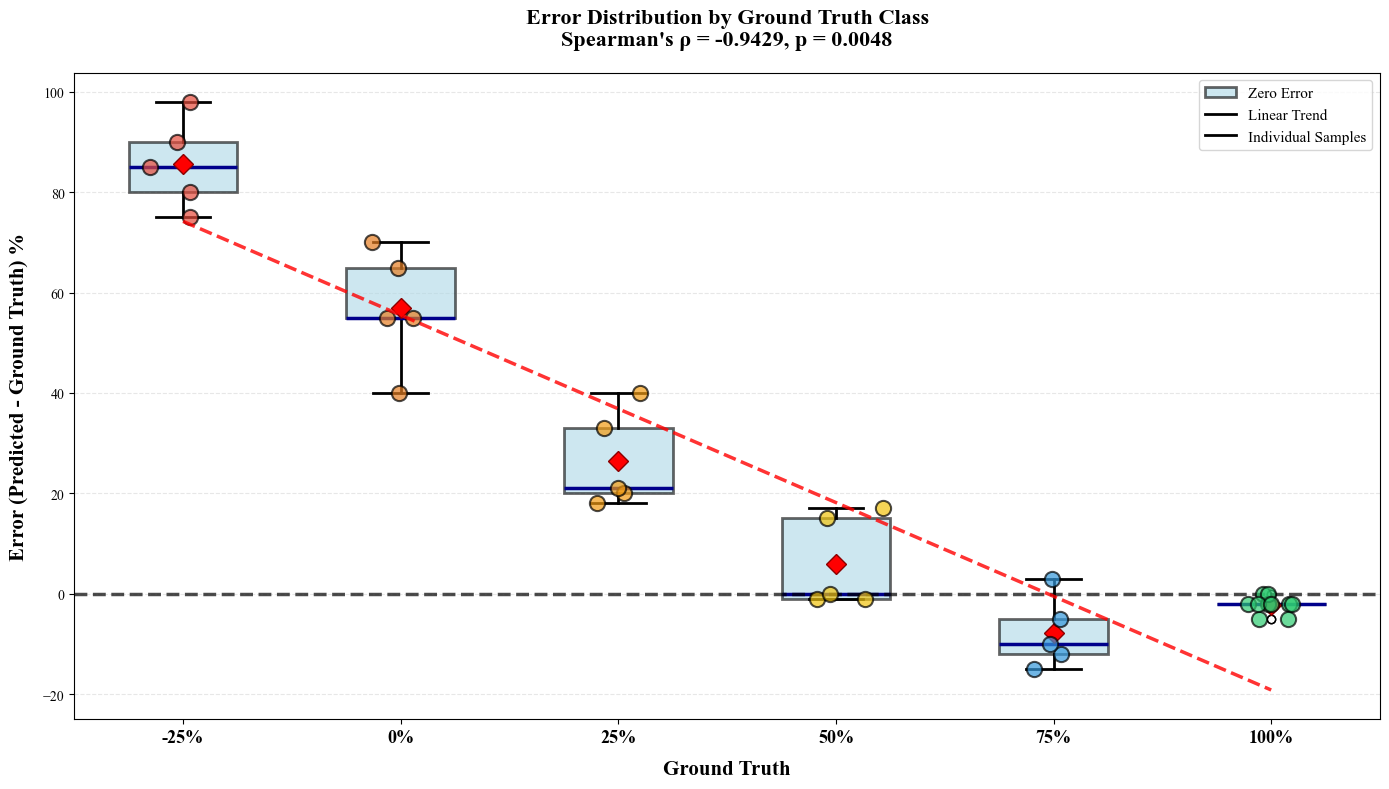

In [45]:
df_clean['error'] = df_clean['predicted_percentage'] - df_clean['groundtruth']

# Get unique ground truth values and sort them
gt_values = sorted(df_clean['groundtruth'].unique())

# Calculate mean error for each ground truth class
mean_errors_by_gt = []
for gt in gt_values:
    subset = df_clean[df_clean['groundtruth'] == gt]
    mean_error = subset['error'].mean()
    mean_errors_by_gt.append(mean_error)

# Create arrays for correlation test
ground_truth_array = np.array(gt_values)
mean_error_array = np.array(mean_errors_by_gt)

print("=" * 80)
print("SPEARMAN'S RANK CORRELATION TEST")
print("=" * 80)
print("\nGround Truth vs Mean Error by Ground Truth Class")
print("-" * 80)

# Perform Spearman's rank correlation
spearman_corr, spearman_pvalue = stats.spearmanr(ground_truth_array, mean_error_array)

print(f"\nGround Truth Values: {ground_truth_array}")
print(f"Mean Errors:         {mean_error_array}")

print("\n" + "=" * 80)
print("RESULTS:")
print("=" * 80)
print(f"Spearman's Rho (ρ):  {spearman_corr:.4f}")
print(f"P-value:             {spearman_pvalue:.6f}")
print(f"Sample size (n):     {len(gt_values)} ground truth classes")

# Interpretation
print("\n" + "=" * 80)
print("INTERPRETATION:")
print("=" * 80)

if spearman_pvalue < 0.001:
    sig_text = "highly significant (p < 0.001)"
elif spearman_pvalue < 0.01:
    sig_text = "very significant (p < 0.01)"
elif spearman_pvalue < 0.05:
    sig_text = "significant (p < 0.05)"
elif spearman_pvalue < 0.10:
    sig_text = "marginally significant (p < 0.10)"
else:
    sig_text = "not significant (p ≥ 0.10)"

print(f"Statistical Significance: {sig_text}")

if abs(spearman_corr) >= 0.9:
    strength = "very strong"
elif abs(spearman_corr) >= 0.7:
    strength = "strong"
elif abs(spearman_corr) >= 0.5:
    strength = "moderate"
elif abs(spearman_corr) >= 0.3:
    strength = "weak"
else:
    strength = "very weak"

direction = "positive (errors increase with ground truth)" if spearman_corr > 0 else "negative (errors decrease with ground truth)"

print(f"Correlation Strength: {strength}")
print(f"Correlation Direction: {direction}")

print("\n" + "=" * 80)
print("WHAT THIS MEANS:")
print("=" * 80)

if spearman_corr > 0 and spearman_pvalue < 0.05:
    print("✓ There is a significant POSITIVE correlation:")
    print("  → As ground truth increases, the mean error tends to increase")
    print("  → The model tends to UNDERESTIMATE more at higher ground truth values")
    print("    (since error = predicted - ground_truth)")
elif spearman_corr < 0 and spearman_pvalue < 0.05:
    print("✓ There is a significant NEGATIVE correlation:")
    print("  → As ground truth increases, the mean error tends to decrease")
    print("  → The model tends to OVERESTIMATE more at lower ground truth values")
    print("    (since error = predicted - ground_truth)")
else:
    print("✗ No significant correlation detected:")
    print("  → The mean error does not show a consistent pattern with ground truth")
    print("  → Errors appear to be independent of the ground truth value")

# Create visualization
fig, ax1 = plt.subplots(figsize=(14, 8))

# Prepare data for boxplot - get all errors for each ground truth class
error_data = []
positions = []
for i, gt in enumerate(gt_values):
    subset = df_clean[df_clean['groundtruth'] == gt]
    error_data.append(subset['error'].values)
    positions.append(i)

# Create boxplot
bp = ax1.boxplot(error_data, positions=positions, widths=0.5,
                patch_artist=True, showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=10, 
                              markeredgecolor='darkred', linewidth=2, zorder=10),
                boxprops=dict(facecolor='lightblue', alpha=0.6, linewidth=2),
                whiskerprops=dict(linewidth=2),
                capprops=dict(linewidth=2),
                medianprops=dict(color='darkblue', linewidth=2.5))

# Overlay individual scatter points with jitter
colors_list = ['#E74C3C', '#E67E22', '#F39C12', '#F1C40F', '#3498DB', '#2ECC71']
for i, gt in enumerate(gt_values):
    subset = df_clean[df_clean['groundtruth'] == gt]
    errors = subset['error'].values
    
    # Add jitter to x-coordinates
    n_points = len(errors)
    jitter = np.random.normal(0, 0.08, n_points)
    x_scatter = np.full(n_points, i) + jitter
    
    ax1.scatter(x_scatter, errors, s=120, alpha=0.7, 
               color=colors_list[i % len(colors_list)],
               edgecolors='black', linewidth=1.5, zorder=15)

# Add zero error line
ax1.axhline(y=0, color='black', linestyle='--', linewidth=2.5, alpha=0.7, 
           label='Zero Error', zorder=5)

# Add red dashed line - linear fit through mean errors
z = np.polyfit(positions, mean_error_array, 1)
p = np.poly1d(z)
x_line = np.linspace(min(positions), max(positions), 100)
ax1.plot(x_line, p(x_line), "r--", linewidth=2.5, alpha=0.8, 
        label='Linear Trend', zorder=20)

# Formatting
ax1.set_xticks(positions)
ax1.set_xticklabels([f'{gt}%' for gt in gt_values], fontsize=13, fontweight='bold')
ax1.set_xlabel('Ground Truth', fontsize=15, fontweight='bold', labelpad=10)
ax1.set_ylabel('Error (Predicted - Ground Truth) %', fontsize=15, fontweight='bold', labelpad=10)
ax1.set_title(f"Error Distribution by Ground Truth Class\nSpearman's ρ = {spearman_corr:.4f}, p = {spearman_pvalue:.4f}", 
             fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, axis='y', linestyle='--')
ax1.legend(['Zero Error', 'Linear Trend', 'Individual Samples'], fontsize=11, loc='best')

plt.tight_layout()
plt.savefig('spearman_correlation_test.svg', bbox_inches='tight')

print("\n" + "=" * 80)
print("STATISTICAL TESTS: Are Errors at Each Ground Truth Significantly ≠ 0?")
print("=" * 80)
print("Testing H0: Error distribution = 0 for each ground truth class")
print("Using both parametric (t-test) and non-parametric (Wilcoxon) tests")
print("-" * 80)

for gt in gt_values:
    subset = df_clean[df_clean['groundtruth'] == gt]
    errors = subset['error'].values
    n = len(errors)
    
    # Perform one-sample t-test against zero (parametric)
    t_stat, t_pvalue = stats.ttest_1samp(errors, 0)
    
    # Perform Wilcoxon signed-rank test against zero (non-parametric)
    # This tests if the median is significantly different from zero
    try:
        wilcox_stat, wilcox_pvalue = stats.wilcoxon(errors)
    except:
        wilcox_stat, wilcox_pvalue = np.nan, np.nan
    
    mean_error = errors.mean()
    median_error = np.median(errors)
    
    # Determine significance for t-test
    if t_pvalue < 0.001:
        t_sig = "***"
        t_sig_text = "highly significant"
    elif t_pvalue < 0.01:
        t_sig = "**"
        t_sig_text = "very significant"
    elif t_pvalue < 0.05:
        t_sig = "*"
        t_sig_text = "significant"
    else:
        t_sig = "ns"
        t_sig_text = "not significant"
    
    # Determine significance for Wilcoxon
    if not np.isnan(wilcox_pvalue):
        if wilcox_pvalue < 0.001:
            w_sig = "***"
            w_sig_text = "highly significant"
        elif wilcox_pvalue < 0.01:
            w_sig = "**"
            w_sig_text = "very significant"
        elif wilcox_pvalue < 0.05:
            w_sig = "*"
            w_sig_text = "significant"
        else:
            w_sig = "ns"
            w_sig_text = "not significant"
    else:
        w_sig = "N/A"
        w_sig_text = "N/A"
    
    print(f"\nGround Truth = {gt}% (n={n}):")
    print(f"  Mean Error: {mean_error:.2f}%, Median Error: {median_error:.2f}%")
    print(f"  T-Test (parametric):")
    print(f"    t-statistic: {t_stat:.4f}, p-value: {t_pvalue:.6f} {t_sig}")
    print(f"    Result: {t_sig_text}")
    if not np.isnan(wilcox_pvalue):
        print(f"  Wilcoxon Test (non-parametric):")
        print(f"    W-statistic: {wilcox_stat:.4f}, p-value: {wilcox_pvalue:.6f} {w_sig}")
        print(f"    Result: {w_sig_text}")
    
    # Conclusion
    if t_pvalue < 0.05:
        print(f"  ✓ CONCLUSION: Errors at GT={gt}% ARE significantly different from zero")
    else:
        print(f"  ✗ CONCLUSION: Errors at GT={gt}% are NOT significantly different from zero")

print("\n" + "-" * 80)
print("Significance codes: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

# Also test overall mean error
print("\n" + "=" * 80)
print("OVERALL T-TEST: Is Overall Mean Error Significantly Different from Zero?")
print("=" * 80)
all_errors = df_clean['error'].values
t_stat_overall, p_value_overall = stats.ttest_1samp(all_errors, 0)
print(f"Overall Mean Error: {all_errors.mean():.2f}%")
print(f"t-statistic: {t_stat_overall:.4f}")
print(f"p-value: {p_value_overall:.6f}")

if p_value_overall < 0.05:
    print(f"Result: SIGNIFICANT - Overall bias IS significantly different from zero")
    if all_errors.mean() > 0:
        print("        → Model shows significant OVERESTIMATION bias")
    else:
        print("        → Model shows significant UNDERESTIMATION bias")
else:
    print(f"Result: NOT SIGNIFICANT - Overall bias is not significantly different from zero")

print("=" * 80)


# Also calculate Pearson for comparison
pearson_corr, pearson_pvalue = stats.pearsonr(ground_truth_array, mean_error_array)
print("\n" + "=" * 80)
print("BONUS - PEARSON'S CORRELATION (for comparison):")
print("=" * 80)
print(f"Pearson's r:  {pearson_corr:.4f}")
print(f"P-value:      {pearson_pvalue:.6f}")
print("\nNote: Spearman is better for non-linear relationships and outliers.")
print("=" * 80)

SPEARMAN'S RANK CORRELATION TEST

Ground Truth vs Mean Error by Ground Truth Class
--------------------------------------------------------------------------------

Ground Truth Values: [-25   0  25  50  75 100]
Mean Errors:         [60.6 57.  51.4 56.  67.2 97.8]

RESULTS:
Spearman's Rho (ρ):  0.4857
P-value:             0.328723
Sample size (n):     6 ground truth classes

INTERPRETATION:
Statistical Significance: not significant (p ≥ 0.10)
Correlation Strength: weak
Correlation Direction: positive (errors increase with ground truth)

WHAT THIS MEANS:
✗ No significant correlation detected:
  → The mean error does not show a consistent pattern with ground truth
  → Errors appear to be independent of the ground truth value

STATISTICAL TESTS: Are Errors at Each Ground Truth Significantly ≠ 0?
Testing H0: Error distribution = 0 for each ground truth class
Using both parametric (t-test) and non-parametric (Wilcoxon) tests
------------------------------------------------------------------

/home/murph_4090ws/miniconda3/envs/mpi_analysis/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


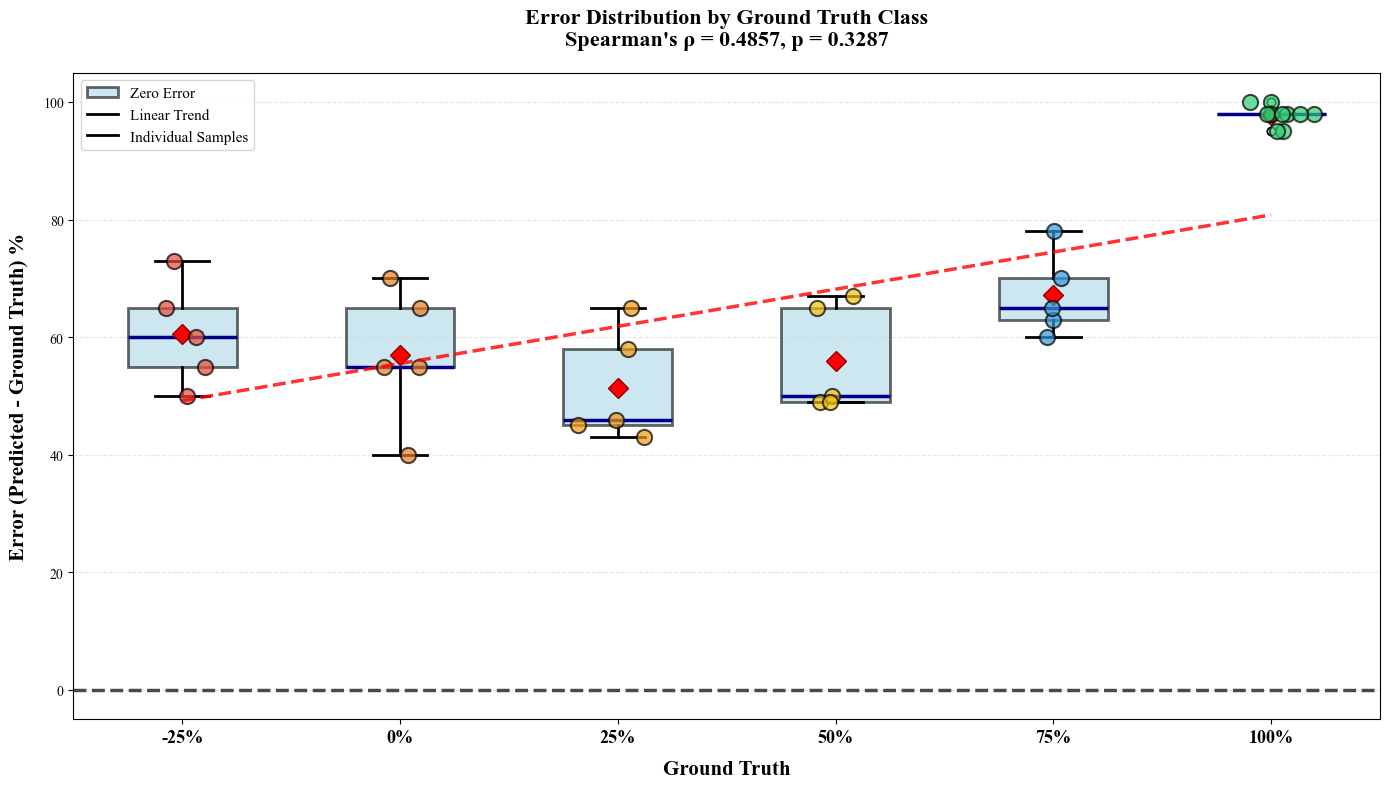

In [48]:
df_clean['error'] = df_clean['predicted_percentage'] - df_clean['groundtruth']

# Get unique ground truth values and sort them
gt_values = sorted(df_clean['groundtruth'].unique())

# Calculate mean error for each ground truth class
mean_errors_by_gt = []
for gt in gt_values:
    subset = df_clean[df_clean['groundtruth'] == gt]
    mean_error = subset['predicted_percentage'].mean()
    mean_errors_by_gt.append(mean_error)

# Create arrays for correlation test
ground_truth_array = np.array(gt_values)
mean_error_array = np.array(mean_errors_by_gt)

print("=" * 80)
print("SPEARMAN'S RANK CORRELATION TEST")
print("=" * 80)
print("\nGround Truth vs Mean Error by Ground Truth Class")
print("-" * 80)

# Perform Spearman's rank correlation
spearman_corr, spearman_pvalue = stats.spearmanr(ground_truth_array, mean_error_array)

print(f"\nGround Truth Values: {ground_truth_array}")
print(f"Mean Errors:         {mean_error_array}")

print("\n" + "=" * 80)
print("RESULTS:")
print("=" * 80)
print(f"Spearman's Rho (ρ):  {spearman_corr:.4f}")
print(f"P-value:             {spearman_pvalue:.6f}")
print(f"Sample size (n):     {len(gt_values)} ground truth classes")

# Interpretation
print("\n" + "=" * 80)
print("INTERPRETATION:")
print("=" * 80)

if spearman_pvalue < 0.001:
    sig_text = "highly significant (p < 0.001)"
elif spearman_pvalue < 0.01:
    sig_text = "very significant (p < 0.01)"
elif spearman_pvalue < 0.05:
    sig_text = "significant (p < 0.05)"
elif spearman_pvalue < 0.10:
    sig_text = "marginally significant (p < 0.10)"
else:
    sig_text = "not significant (p ≥ 0.10)"

print(f"Statistical Significance: {sig_text}")

if abs(spearman_corr) >= 0.9:
    strength = "very strong"
elif abs(spearman_corr) >= 0.7:
    strength = "strong"
elif abs(spearman_corr) >= 0.5:
    strength = "moderate"
elif abs(spearman_corr) >= 0.3:
    strength = "weak"
else:
    strength = "very weak"

direction = "positive (errors increase with ground truth)" if spearman_corr > 0 else "negative (errors decrease with ground truth)"

print(f"Correlation Strength: {strength}")
print(f"Correlation Direction: {direction}")

print("\n" + "=" * 80)
print("WHAT THIS MEANS:")
print("=" * 80)

if spearman_corr > 0 and spearman_pvalue < 0.05:
    print("✓ There is a significant POSITIVE correlation:")
    print("  → As ground truth increases, the mean error tends to increase")
    print("  → The model tends to UNDERESTIMATE more at higher ground truth values")
    print("    (since error = predicted - ground_truth)")
elif spearman_corr < 0 and spearman_pvalue < 0.05:
    print("✓ There is a significant NEGATIVE correlation:")
    print("  → As ground truth increases, the mean error tends to decrease")
    print("  → The model tends to OVERESTIMATE more at lower ground truth values")
    print("    (since error = predicted - ground_truth)")
else:
    print("✗ No significant correlation detected:")
    print("  → The mean error does not show a consistent pattern with ground truth")
    print("  → Errors appear to be independent of the ground truth value")

# Create visualization
fig, ax1 = plt.subplots(figsize=(14, 8))

# Prepare data for boxplot - get all errors for each ground truth class
error_data = []
positions = []
for i, gt in enumerate(gt_values):
    subset = df_clean[df_clean['groundtruth'] == gt]
    error_data.append(subset['predicted_percentage'].values)
    positions.append(i)

# Create boxplot
bp = ax1.boxplot(error_data, positions=positions, widths=0.5,
                patch_artist=True, showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=10, 
                              markeredgecolor='darkred', linewidth=2, zorder=10),
                boxprops=dict(facecolor='lightblue', alpha=0.6, linewidth=2),
                whiskerprops=dict(linewidth=2),
                capprops=dict(linewidth=2),
                medianprops=dict(color='darkblue', linewidth=2.5))

# Overlay individual scatter points with jitter
colors_list = ['#E74C3C', '#E67E22', '#F39C12', '#F1C40F', '#3498DB', '#2ECC71']
for i, gt in enumerate(gt_values):
    subset = df_clean[df_clean['groundtruth'] == gt]
    errors = subset['predicted_percentage'].values

    # Add jitter to x-coordinates
    n_points = len(errors)
    jitter = np.random.normal(0, 0.08, n_points)
    x_scatter = np.full(n_points, i) + jitter
    
    ax1.scatter(x_scatter, errors, s=120, alpha=0.7, 
               color=colors_list[i % len(colors_list)],
               edgecolors='black', linewidth=1.5, zorder=15)

# Add zero error line
ax1.axhline(y=0, color='black', linestyle='--', linewidth=2.5, alpha=0.7, 
           label='Zero Error', zorder=5)

# Add red dashed line - linear fit through mean errors
z = np.polyfit(positions, mean_error_array, 1)
p = np.poly1d(z)
x_line = np.linspace(min(positions), max(positions), 100)
ax1.plot(x_line, p(x_line), "r--", linewidth=2.5, alpha=0.8, 
        label='Linear Trend', zorder=20)

# Formatting
ax1.set_xticks(positions)
ax1.set_xticklabels([f'{gt}%' for gt in gt_values], fontsize=13, fontweight='bold')
ax1.set_xlabel('Ground Truth', fontsize=15, fontweight='bold', labelpad=10)
ax1.set_ylabel('Error (Predicted - Ground Truth) %', fontsize=15, fontweight='bold', labelpad=10)
ax1.set_title(f"Error Distribution by Ground Truth Class\nSpearman's ρ = {spearman_corr:.4f}, p = {spearman_pvalue:.4f}", 
             fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, axis='y', linestyle='--')
ax1.legend(['Zero Error', 'Linear Trend', 'Individual Samples'], fontsize=11, loc='best')

plt.tight_layout()
plt.savefig('spearman_correlation_test2.svg', bbox_inches='tight')

print("\n" + "=" * 80)
print("STATISTICAL TESTS: Are Errors at Each Ground Truth Significantly ≠ 0?")
print("=" * 80)
print("Testing H0: Error distribution = 0 for each ground truth class")
print("Using both parametric (t-test) and non-parametric (Wilcoxon) tests")
print("-" * 80)

for gt in gt_values:
    subset = df_clean[df_clean['groundtruth'] == gt]
    errors = subset['error'].values
    n = len(errors)
    
    # Perform one-sample t-test against zero (parametric)
    t_stat, t_pvalue = stats.ttest_1samp(errors, 0)
    
    # Perform Wilcoxon signed-rank test against zero (non-parametric)
    # This tests if the median is significantly different from zero
    try:
        wilcox_stat, wilcox_pvalue = stats.wilcoxon(errors)
    except:
        wilcox_stat, wilcox_pvalue = np.nan, np.nan
    
    mean_error = errors.mean()
    median_error = np.median(errors)
    
    # Determine significance for t-test
    if t_pvalue < 0.001:
        t_sig = "***"
        t_sig_text = "highly significant"
    elif t_pvalue < 0.01:
        t_sig = "**"
        t_sig_text = "very significant"
    elif t_pvalue < 0.05:
        t_sig = "*"
        t_sig_text = "significant"
    else:
        t_sig = "ns"
        t_sig_text = "not significant"
    
    # Determine significance for Wilcoxon
    if not np.isnan(wilcox_pvalue):
        if wilcox_pvalue < 0.001:
            w_sig = "***"
            w_sig_text = "highly significant"
        elif wilcox_pvalue < 0.01:
            w_sig = "**"
            w_sig_text = "very significant"
        elif wilcox_pvalue < 0.05:
            w_sig = "*"
            w_sig_text = "significant"
        else:
            w_sig = "ns"
            w_sig_text = "not significant"
    else:
        w_sig = "N/A"
        w_sig_text = "N/A"
    
    print(f"\nGround Truth = {gt}% (n={n}):")
    print(f"  Mean Error: {mean_error:.2f}%, Median Error: {median_error:.2f}%")
    print(f"  T-Test (parametric):")
    print(f"    t-statistic: {t_stat:.4f}, p-value: {t_pvalue:.6f} {t_sig}")
    print(f"    Result: {t_sig_text}")
    if not np.isnan(wilcox_pvalue):
        print(f"  Wilcoxon Test (non-parametric):")
        print(f"    W-statistic: {wilcox_stat:.4f}, p-value: {wilcox_pvalue:.6f} {w_sig}")
        print(f"    Result: {w_sig_text}")
    
    # Conclusion
    if t_pvalue < 0.05:
        print(f"  ✓ CONCLUSION: Errors at GT={gt}% ARE significantly different from zero")
    else:
        print(f"  ✗ CONCLUSION: Errors at GT={gt}% are NOT significantly different from zero")

print("\n" + "-" * 80)
print("Significance codes: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

# Also test overall mean error
print("\n" + "=" * 80)
print("OVERALL T-TEST: Is Overall Mean Error Significantly Different from Zero?")
print("=" * 80)
all_errors = df_clean['error'].values
t_stat_overall, p_value_overall = stats.ttest_1samp(all_errors, 0)
print(f"Overall Mean Error: {all_errors.mean():.2f}%")
print(f"t-statistic: {t_stat_overall:.4f}")
print(f"p-value: {p_value_overall:.6f}")

if p_value_overall < 0.05:
    print(f"Result: SIGNIFICANT - Overall bias IS significantly different from zero")
    if all_errors.mean() > 0:
        print("        → Model shows significant OVERESTIMATION bias")
    else:
        print("        → Model shows significant UNDERESTIMATION bias")
else:
    print(f"Result: NOT SIGNIFICANT - Overall bias is not significantly different from zero")

print("=" * 80)


# Also calculate Pearson for comparison
pearson_corr, pearson_pvalue = stats.pearsonr(ground_truth_array, mean_error_array)
print("\n" + "=" * 80)
print("BONUS - PEARSON'S CORRELATION (for comparison):")
print("=" * 80)
print(f"Pearson's r:  {pearson_corr:.4f}")
print(f"P-value:      {pearson_pvalue:.6f}")
print("\nNote: Spearman is better for non-linear relationships and outliers.")
print("=" * 80)